<a href="https://colab.research.google.com/github/hellocybernetics/TensorFlow_Eager_Execution_Tutorials/blob/master/tutorials/01_basics/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.enable_eager_execution()
tfk = tf.keras
tfe = tf.contrib.eager

In [0]:
x_train_p = np.random.randn(20, 2) + 0.9
x_train_n = np.random.randn(20, 2) - 0.9

x_train = np.vstack([x_train_p, x_train_n])
y_train = np.array([1] * 20 + [0] * 20).reshape(-1, 1)

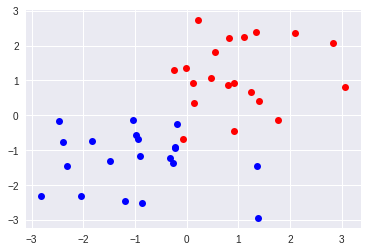

In [3]:
plt.plot(x_train_p[:, 0], x_train_p[:, 1], 'ro')
plt.plot(x_train_n[:, 0], x_train_n[:, 1], 'bo')

In [0]:
# Hyper-parameters
input_size = 2
output_size = 1
num_epochs = 100
learning_rate = 1e-3

# convert to tensor
x_train_ = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train_ = tf.convert_to_tensor(y_train, dtype=tf.float32)

In [0]:
# Logistic regression model
model = tfk.layers.Dense(output_size, activation="sigmoid")

# loss function
def loss_fn(model, x, y):
    predict_y = model(x)
    # first arg: true_y,  second arg: predict_y
    return tfk.losses.binary_crossentropy(y, predict_y)

def accuracy_fn(model, x, y):
    predict_y = model(x)
    return tfk.metrics.binary_accuracy(y, predict_y)

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

[-3.5, 3.5, -3.5, 3.5]

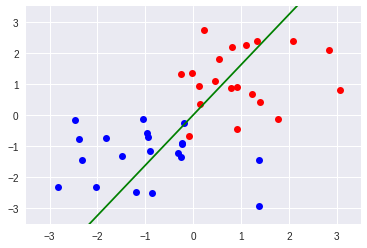

In [6]:
model(x_train_)
coeffs = model.weights[0].numpy()
bias = model.weights[1].numpy()

plt.plot(x_train_p[:, 0], x_train_p[:, 1], 'ro')
plt.plot(x_train_n[:, 0], x_train_n[:, 1], 'bo')

plot_x = np.array([min(x_train[:,0])-0.5, max(x_train[:,0])+0.5])
plot_y = - (bias + coeffs[0]*plot_x) / coeffs[1]
plt.plot(plot_x, plot_y, 'g')
plt.axis([-3.5, 3.5, -3.5, 3.5])

In [7]:
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, x_train_, y_train_)
    grads = tape.gradient(loss, model.variables)
    
    accuracy = accuracy_fn(model=model, x=x_train_, y=y_train_)
    
    if (epoch+1) % 5 == 0:
        print(
            "loss: {:0.3f},  acc: {}".format(
                tf.reduce_sum(loss).numpy(),
                accuracy.numpy().mean()   
            )  
        ) 
    # update prameters using grads
    optimizer.apply_gradients(zip(grads, model.variables))

loss: 27.467,  acc: 0.574999988079071
loss: 23.374,  acc: 0.7250000238418579
loss: 20.373,  acc: 0.800000011920929
loss: 18.131,  acc: 0.875
loss: 16.414,  acc: 0.8999999761581421
loss: 15.066,  acc: 0.925000011920929
loss: 13.983,  acc: 0.925000011920929
loss: 13.094,  acc: 0.949999988079071
loss: 12.352,  acc: 0.949999988079071
loss: 11.724,  acc: 0.949999988079071
loss: 11.183,  acc: 0.949999988079071
loss: 10.714,  acc: 0.949999988079071
loss: 10.302,  acc: 0.949999988079071
loss: 9.937,  acc: 0.949999988079071
loss: 9.612,  acc: 0.949999988079071
loss: 9.319,  acc: 0.949999988079071
loss: 9.055,  acc: 0.949999988079071
loss: 8.814,  acc: 0.949999988079071
loss: 8.595,  acc: 0.949999988079071
loss: 8.393,  acc: 0.949999988079071


[-3.5, 3.5, -3.5, 3.5]

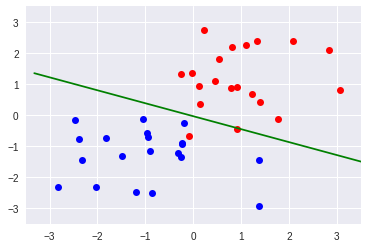

In [8]:
coeffs = model.weights[0].numpy()
bias = model.weights[1].numpy()

plt.plot(x_train_p[:, 0], x_train_p[:, 1], 'ro')
plt.plot(x_train_n[:, 0], x_train_n[:, 1], 'bo')

plot_x = np.array([min(x_train[:,0])-0.5, max(x_train[:,0])+0.5])
plot_y = - (bias + coeffs[0]*plot_x) / coeffs[1]
plt.plot(plot_x, plot_y, 'g')
plt.axis([-3.5, 3.5, -3.5, 3.5])